In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

import pickle
import os
import pdb

sys.path.append(os.path.abspath("../workstation"))
from imitation_learning.linear_regression import DMPTrajectory, load_data, train2
from utils.trajectory_utils import truncate_expert_data

Mean: [1.   0.88 0.78 0.69 0.61]
Std: [ 55.71  71.54  91.86 117.94 117.94]
Mean: [1.   0.88 0.78 0.69 0.61]
Std: [ 55.71  71.54  91.86 117.94 117.94]
Traj start: 318, end: 1254
Traj start: 275, end: 1502
Traj start: 154, end: 1628
Traj start: 478, end: 3597
Traj start: 422, end: 1528
Traj start: 491, end: 1615
dd_pos: max: -14.000, min: 24.000, mean: 0.008
dd_pos: max: -50.000, min: 30.333, mean: -0.009
dd_pos: max: -37.571, min: 51.500, mean: 0.008
dd_pos: max: -21.333, min: 31.750, mean: 0.009
dd_pos: max: -13.917, min: 10.000, mean: 0.002
Train size: 5280 Test size: 587
Score (max 1.0) Train: 0.017, Test: 0.007
Got weights for dim: 0, min: 0.085, max: 0.296, avg: 0.217
Score (max 1.0) Train: 0.002, Test: -0.005
Got weights for dim: 1, min: -0.019, max: -0.008, avg: -0.013
Score (max 1.0) Train: 0.001, Test: -0.001
Got weights for dim: 2, min: 0.008, max: 0.038, avg: 0.020
Did save dmp params: /home/mohit/projects/robot-interface/trained_weights/position_dmp/weights_tau_0.75_alpha_5.

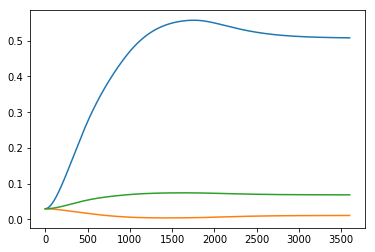

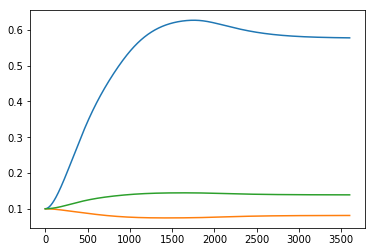

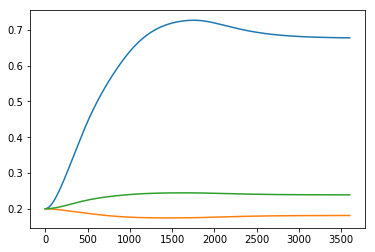

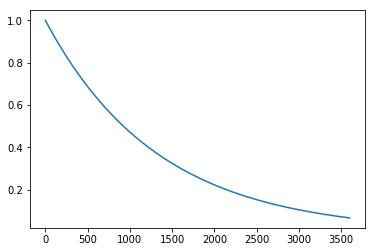

In [2]:
h5_path = '../data/traj_cut_Dec_8_7_00_PM/h5/expert_traj.h5'
train_joint_space_dmp = 0
if train_joint_space_dmp:
    num_dims, num_basis, num_sensors = 7, 5, 2
    train_type = 'joint'
else:
    num_dims, num_basis, num_sensors = 3, 5, 2
    train_type = 'position'
    
dmp_traj = DMPTrajectory(num_dims, num_basis, num_sensors)
dmp_traj.tau = 0.75
dmp_traj.alpha = 5.0
dmp_traj.beta = 5.0/4
weights = train2(dmp_traj, h5_path, train_type)  

save_data_dict = {
    'tau':dmp_traj.tau
}

save_weights_path = '../trained_weights/position_dmp/weights_tau_{:.2f}_alpha_{:.2f}_basis_{}_sensors_{}.pkl'.format(
    dmp_traj.tau, dmp_traj.alpha, num_basis, num_sensors)
dmp_traj.save_weights(os.path.abspath(save_weights_path), 
                      weights,
                      traj_run_time=3600,
                      dt=0.001)

all_y, all_dy = [], []
for i, start_val in enumerate([0.03, 0.1, 0.2]):
    y, dy = dmp_traj.run_dmp_with_weights(
        weights,                                                                                                                                                      
        start_val * np.ones((dmp_traj.num_dims)),                                                                                                                                
        0.001,                                                                                                                                                         
        traj_time=3600)  
    plt.plot(y)
    plt.show()
    all_y.append(y)
    all_dy.append(dy)

all_y, all_dy = np.array(all_y), np.array(all_dy)
    
x = dmp_traj.get_x_values(0.001 * np.ones((3600,)))
plt.plot(x)
plt.show()

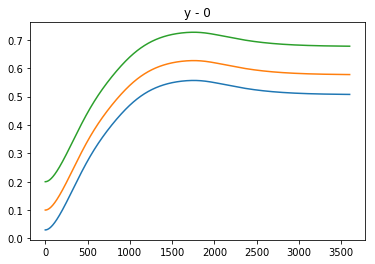

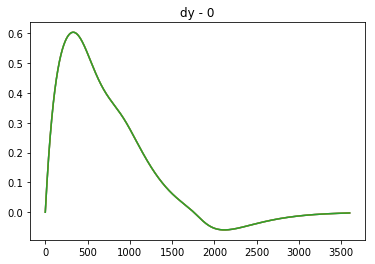

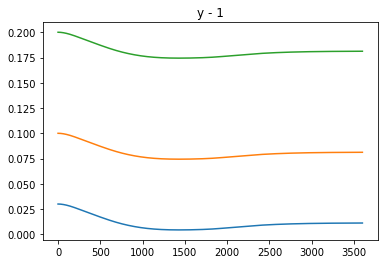

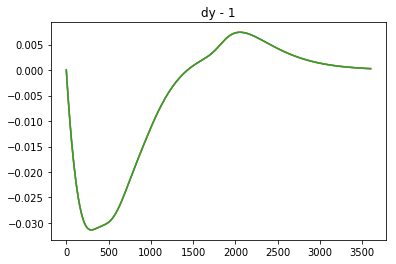

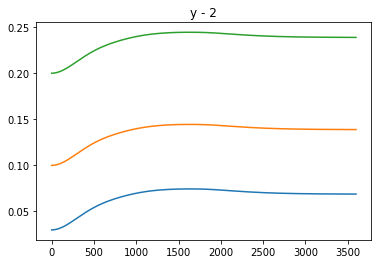

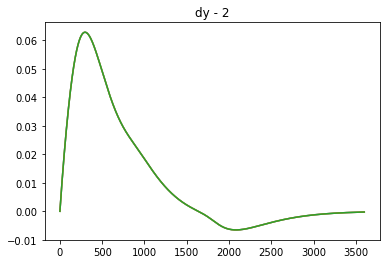

In [3]:
def visualize_dmp_trajectories(data, title=""):
    for i in range(data.shape[0]):
        plt.plot(data[i, :])
        plt.title(title)
    plt.show()

for dim in range(all_y.shape[-1]):
    visualize_dmp_trajectories(all_y[:, :, dim], title="y - {}".format(dim))
    visualize_dmp_trajectories(all_dy[:, :, dim], title="dy - {}".format(dim))